<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%203%20-%20Classification/All_Classification_algorithms_on_Advertising_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [5]:
%cd my_methods
from visualise_classifier_performance import visualise_classifier_performance

/content/my_methods


In [6]:
%cd ../

/content


# Read Data

In [0]:
df = pd.read_csv('https://bit.ly/2U2dZq6')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Train Test Split

In [7]:
def preprocessing(all_data = False):
  import pandas as pd
  df = pd.read_csv('https://bit.ly/2U2dZq6')
  X = df.iloc[:, 2:-1]
  y = df.Purchased
  from sklearn.model_selection import train_test_split  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)
  if all_data:
    return X, y, X_train, X_test, y_train, y_test
  return X_train, X_test, y_train, y_test
X, y, X_train, X_test, y_train, y_test = preprocessing(True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [8]:
X.shape, y.shape

((400, 2), (400,))

# Feature_scaling

In [0]:
def scaling(X_train = X_train, X_test = X_test, all_data = False):
  from sklearn.preprocessing import StandardScaler  
  sc = StandardScaler()
  X_train_scaled = sc.fit_transform(X_train)
  if not all_data:
    X_test_scaled = sc.transform(X_test)
    return X_train_scaled, X_test_scaled
  return X_train_scaled

X_train_scaled, X_test_scaled = scaling()

In [0]:
X_train_scaled, X_test_scaled = scaling()

In [11]:
X_scaled = scaling(X, all_data = True)
X_scaled[:2]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138]])

In [12]:
X_scaled.shape

(400, 2)

# Train_Model

## functions we are using for all models

### for printing the model results

In [0]:
def model_fit(X_train, X_test, model):
  from sklearn.metrics import confusion_matrix, classification_report
  model.fit(X_train, y_train)
  print(F' Train score is {model.score(X_train, y_train)}')
  print('\n')
  print(f'Test score is {model.score(X_test, y_test)}')
  print('\n\n')
  y_pred = model.predict(X_test)
  print(f'Train confusion matrix is \n {confusion_matrix(y_train, model.predict(X_train))}\n')
  print(f'Test confusion matrix is \n {confusion_matrix(y_test, y_pred)}')
  print('\n\n')
  print(f'Test Set classification report is \n {classification_report(y_test, y_pred)}')
  return model

### Cross_validation

In [0]:
def cross_validation(X, y, model, cv = 10, out = True):
  from sklearn.model_selection import cross_val_score
  cross_val_scores = cross_val_score(model, X, y, cv = cv)
  mean = np.mean(cross_val_scores)
  if out:
    print(f'{cv} fold cross-validation for -- {model.__class__.__name__}-- Model \n\n')
    print(f'cross validation score for {cv} fold cross-validation is:-- \n {cross_val_scores}\n\n')
    print(f'variance in scores for {cv} fold cross-validationn for {model.__class__.__name__}:-- {cross_val_scores.std()}\n\n')
    return f'Mean for {cv} fold cross-validation score:-- {mean}'
  return mean

## 1.1 LogisticRegression

##### cross_validation

In [21]:
import warnings
warnings.filterwarnings('ignore')
model = LogisticRegression()
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- LogisticRegression-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.65853659 0.70731707 0.97560976 0.95       0.95       0.9
 0.825      0.76923077 0.76923077 0.71794872]


variance in scores for 10 fold cross-validationn for LogisticRegression:-- 0.10896074785365382




'Mean for 10 fold cross-validation score:-- 0.8222873671044402'

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression(random_state = 0)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.8233333333333334


Test score is 0.89



Train confusion matrix is 
 [[172  17]
 [ 36  75]]

Test confusion matrix is 
 [[65  3]
 [ 8 24]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [0]:
y_proba = model.predict_proba(X_test_scaled)

In [24]:
y_proba[:2]

array([[0.8835313 , 0.1164687 ],
       [0.82871699, 0.17128301]])

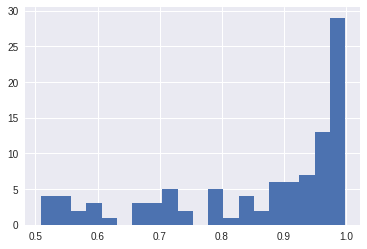

In [0]:
y_max_proba = [np.max(i) for i in y_proba]
plt.hist(y_max_proba, bins = 20)
plt.show()

##### Visualisation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LogisticRegression Classifier 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)





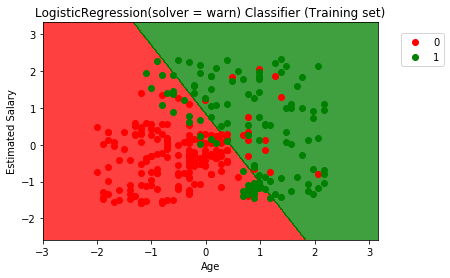

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


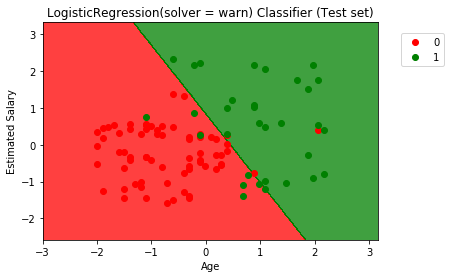

In [27]:
visualise_classifier_performance(X_train_scaled, X_test_scaled,y_train, y_test, model,important_parameter = 'solver', classifier_parameters = True)

### 1.2 LogisticRegression with PolynomialFeatures

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
lrmodel = LogisticRegression()
model = model_fit(X_train_poly, X_test_poly, lrmodel)

 Train score is 0.8966666666666666


Test score is 0.92



Train confusion matrix is 
 [[175  14]
 [ 17  94]]

Test confusion matrix is 
 [[64  4]
 [ 4 28]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



###### **cross_validation for polynomial Features**

**Cross Validation for polynomial feature**

In [29]:
model = LogisticRegression()
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(3).fit_transform(X_scaled)
cross_validation(X_poly, y, model)

10 fold cross-validation for -- LogisticRegression-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.97560976 0.85365854 0.87804878 0.975      0.95       0.875
 0.825      0.79487179 0.87179487 0.94871795]


variance in scores for 10 fold cross-validationn for LogisticRegression:-- 0.06055461868961714




'Mean for 10 fold cross-validation score:-- 0.8947701688555348'

##### probability of y_test

In [0]:
y_test_proba = lrmodel.predict_proba(X_test_poly)

In [35]:
y_test_proba[:2]

array([[0.92179931, 0.07820069],
       [0.94143201, 0.05856799]])

In [36]:
y_max_proba = [np.max(i) for i in y_test_proba]
y_max_proba[:2]

[0.9217993143434112, 0.941432009710901]

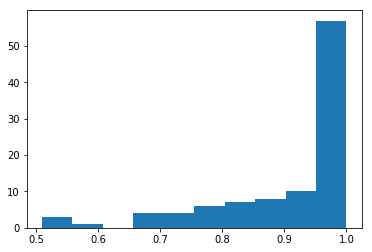

In [37]:
plt.hist(y_max_proba)
plt.show()

## 2. KNN

### Graph Train score, Test Score vs. n_neighbors Without scaling features

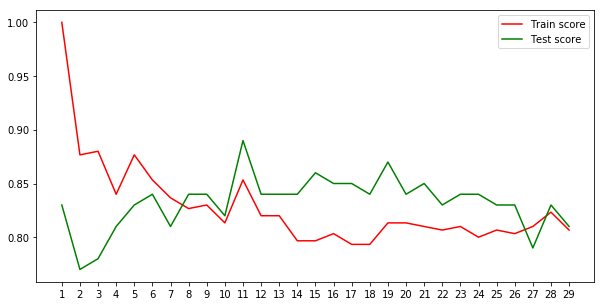

In [39]:
def plotting(X_train, X_test):
  from sklearn.neighbors import KNeighborsClassifier
  x = range(1,30)
  t = []
  s = []
  for i in x:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    s.append(model.score(X_test, y_test))
    t.append(model.score(X_train, y_train))

  plt.figure(figsize =(10, 5))
  plt.plot(x, t, c = 'r', label = 'Train score')
  plt.plot(x, s, c = 'g', label = 'Test score')
  plt.xticks(x)          
  plt.legend()    
  plt.grid()
  plt.grid()
  plt.show()
plotting(X_train, X_test)

### Graph Train Score, Test Score vs. n_neighbors After Scaling the Features

In [0]:
X_train_scaled, X_test_scaled = scaling()

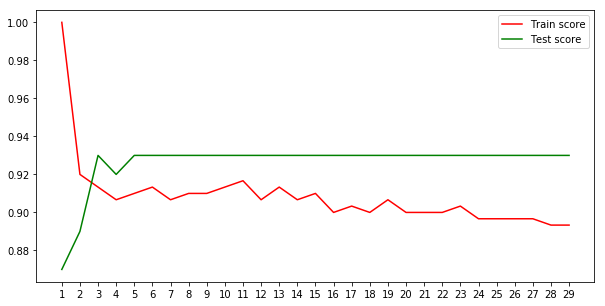

In [41]:
plotting(X_train_scaled, X_test_scaled)

###K-NN classifier Graph for polynomialFeatures of degree 6

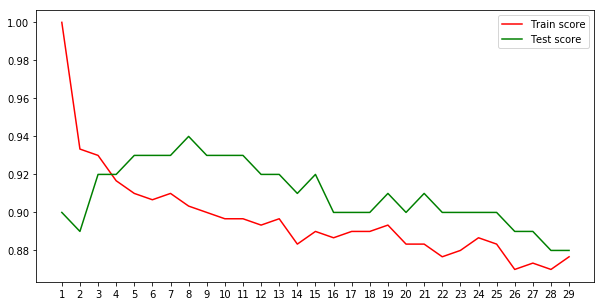

In [42]:
plotting(X_train_poly, X_test_poly)

### model for n_neighbors = 3

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_scaled, y_train)
modele = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9133333333333333


Test score is 0.93



Train confusion matrix is 
 [[174  15]
 [ 11 100]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



#### **Cross Validation for for linear Features with n_neighbors = 3**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(3)
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- KNeighborsClassifier-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [1.         0.80487805 0.90243902 1.         0.975      0.825
 0.875      0.79487179 0.87179487 0.8974359 ]


variance in scores for 10 fold cross-validationn for KNeighborsClassifier:-- 0.07245418711799607




'Mean for 10 fold cross-validation score:-- 0.8946419637273296'

#### **Cross Validation for polynomialFeatures of degree 3 and n_neighbors = 3**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(3)
cross_validation(X_poly, y, model)

10 fold cross-validation for -- KNeighborsClassifier-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [1.         0.80487805 0.90243902 1.         0.975      0.825
 0.825      0.79487179 0.84615385 0.92307692]


variance in scores for 10 fold cross-validationn for KNeighborsClassifier:-- 0.07703254991607365




'Mean for 10 fold cross-validation score:-- 0.8896419637273295'

### model for n_neighbors = 11


#### cross_validation for Scaled Linear Features n_neighbors = 5

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- KNeighborsClassifier-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [1.         0.80487805 0.90243902 1.         0.975      0.825
 0.85       0.82051282 0.8974359  0.94871795]


variance in scores for 10 fold cross-validationn for KNeighborsClassifier:-- 0.07172505651318489




'Mean for 10 fold cross-validation score:-- 0.9023983739837398'

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
model = KNeighborsClassifier(n_neighbors = 5)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.91


Test score is 0.93



Train confusion matrix is 
 [[172  17]
 [ 10 101]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



#### Visualisation

KNeighborsClassifier Classifier 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


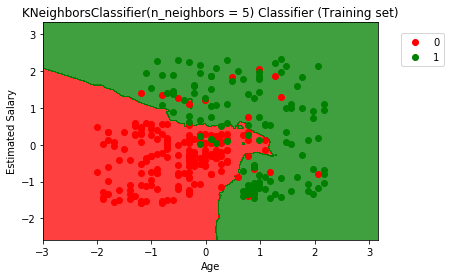

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


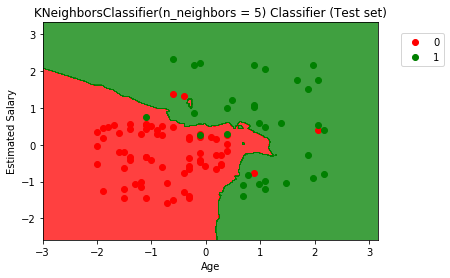

In [51]:
visualise_classifier_performance(X_train_scaled, X_test_scaled,y_train, y_test, model, important_parameter = 'n_neighbors')

## 3. SVC

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

### 3.1 Linear SVC

#### cross_validation

In [58]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- SVC-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.65853659 0.70731707 0.97560976 0.95       0.925      0.9
 0.825      0.76923077 0.79487179 0.66666667]


variance in scores for 10 fold cross-validationn for SVC:-- 0.11134416125496528




'Mean for 10 fold cross-validation score:-- 0.8172232645403377'

In [59]:
model = SVC(kernel = 'linear')
model.fit(X_train_scaled, y_train)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.8233333333333334


Test score is 0.9



Train confusion matrix is 
 [[173  16]
 [ 37  74]]

Test confusion matrix is 
 [[66  2]
 [ 8 24]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



#### Visualisation

SVC Classifier 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


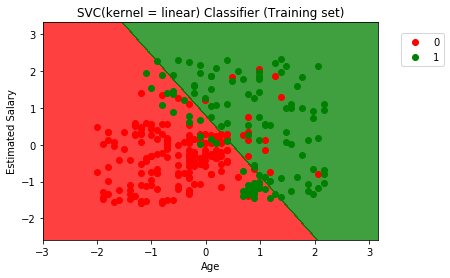

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


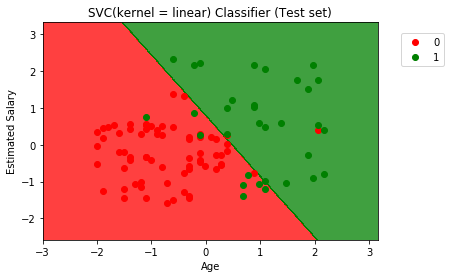

In [60]:
visualise_classifier_performance(X_train_scaled, X_test_scaled,y_train, y_test, model, important_parameter = 'kernel')

### 3.2 rbf SVC

#### cross_validation

In [61]:
from sklearn.svm import SVC
model = SVC()
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- SVC-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [1.         0.85365854 0.90243902 1.         0.95       0.875
 0.85       0.79487179 0.87179487 0.94871795]


variance in scores for 10 fold cross-validationn for SVC:-- 0.06464002482773204




'Mean for 10 fold cross-validation score:-- 0.9046482176360225'

In [62]:
model = SVC(kernel = 'rbf')
model.fit(X_train_scaled, y_train)
modele = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9133333333333333


Test score is 0.93



Train confusion matrix is 
 [[171  18]
 [  8 103]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



#### Visualisation

SVC Classifier 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


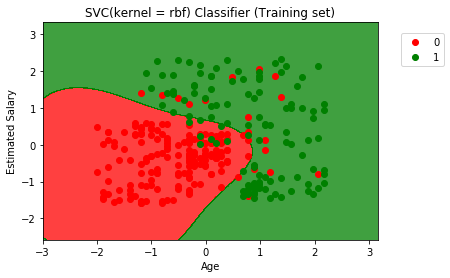

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


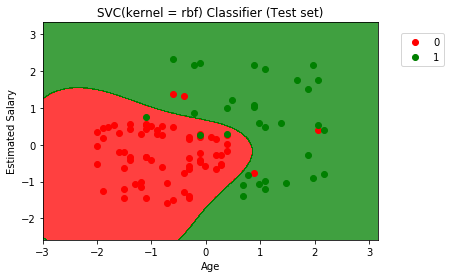

In [63]:
visualise_classifier_performance(X_train_scaled, X_test_scaled,y_train, y_test, model, important_parameter = 'kernel')

### 3.3 GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

In [65]:
param_grid = {'C':np.linspace(0.1, 3, 20), 'kernel': ['linear', 'rbf', 'poly'], 'gamma': np.linspace(0.1, 3, 20)}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 3, scoring = 'accuracy',verbose = 1)
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   17.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1       , 0.25263158, 0.40526316, 0...
       2.38947368, 2.54210526, 2.69473684, 2.84736842, 3.        ]),
                         'gamma': array([0.1       , 0.25263158, 0.40526316, 0.55789474, 0.71052632,
       0.86315789, 1.01578947, 1.16842105, 1.32105263, 1.47368421,
       1.62631579, 1.77894737, 1.93157895, 2.08421053, 2.23684211,
       2.38947368, 2.54210526, 2.69473684, 2.84736842, 3.        ]),
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_job

In [66]:
grid.best_params_

{'C': 2.694736842105263, 'gamma': 0.8631578947368421, 'kernel': 'rbf'}

In [67]:
grid.best_score_

0.9166666666666666

In [68]:
model = grid.best_estimator_
model

SVC(C=2.694736842105263, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8631578947368421,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9133333333333333


Test score is 0.93



Train confusion matrix is 
 [[171  18]
 [  8 103]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## 4. DecisionTreeClassifier
**decision tree classifier is not based on Euclidean distance so we don't need to do feature scaling but for graphical boundary we need feature scaling for computation**

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 1.0


Test score is 0.9



Train confusion matrix is 
 [[189   0]
 [  0 111]]

Test confusion matrix is 
 [[62  6]
 [ 4 28]]



classification report is 
              precision    recall  f1-score   support

          0       0.94      0.91      0.93        68
          1       0.82      0.88      0.85        32

avg / total       0.90      0.90      0.90       100



In [0]:
try:
  graph(X_train, X_test, model)
except Exception as e:
  print(f'{type(e).__name__}:-- {e}')

DecisionTreeClassifier Model 

TypeError:-- unhashable type: 'slice'


**^^it's an overfitting model so we will understand restrict DecisionTree classifier to learn more by max_depth parameter**

### Graph Train score, Test score vs. max_depth for Decision Tree Classifier to visualise overfitting

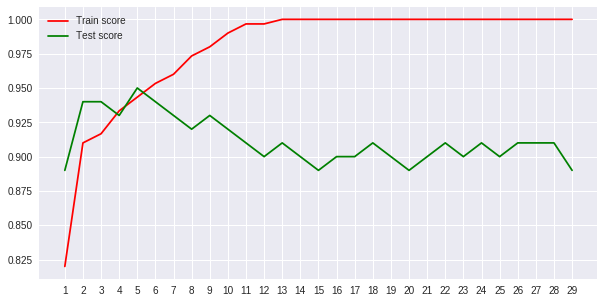

In [0]:
def plotting_d(X_train, X_test):
  from sklearn.tree import DecisionTreeClassifier
  x = range(1,30)
  t = []
  s = []
  for i in x:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    s.append(model.score(X_test, y_test))
    t.append(model.score(X_train, y_train))

  plt.figure(figsize =(10, 5))
  plt.plot(x, t, c = 'r', label = 'Train score')
  plt.plot(x, s, c = 'g', label = 'Test score')
  plt.xticks(x)          
  plt.legend()    
  plt.grid()
  plt.grid()
  plt.show()
plotting(X_train_scaled, X_test_scaled)

In [0]:
model = DecisionTreeClassifier(max_depth = 5)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9433333333333334


Test score is 0.95



Train confusion matrix is 
 [[182   7]
 [ 10 101]]

Test confusion matrix is 
 [[66  2]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.97      0.96        68
          1       0.94      0.91      0.92        32

avg / total       0.95      0.95      0.95       100



### Visualisation Decision boundary

DecisionTreeClassifier Model 



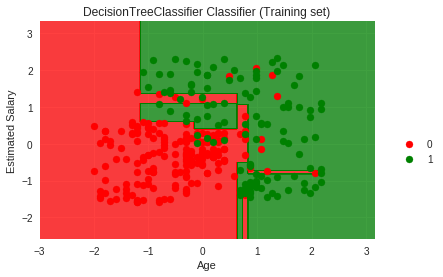

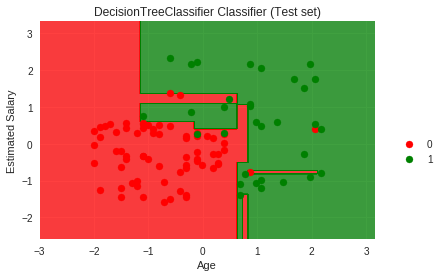

In [0]:
graph(X_train_scaled, X_test_scaled, model)

### cross_validation for max_depth = 5

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5, random_state = 0)
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- DecisionTreeClassifier-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.95121951 0.75609756 0.92682927 0.95       0.95       0.875
 0.825      0.84615385 0.74358974 0.94871795]


variance in scores for 10 fold cross-validationn for DecisionTreeClassifier:-- 0.0773740638187005




'Mean for 10 fold cross-validation score:-- 0.8772607879924953'

### graph for cross_validation score vs. max_depth for decision tree

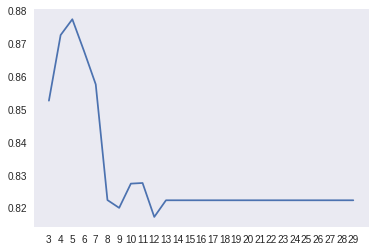

In [0]:
x = range(3, 30)
score = []
for i in x:
  model = DecisionTreeClassifier(max_depth = i, random_state = 0)
  score.append(cross_validation(X_scaled, y, model, out = False))

plt.plot(figsize = (15, 7))
plt.plot(x, score)
plt.xticks(x)
plt.grid()
plt.show()

## 5. RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model = RandomForestClassifier(n_estimators = 10, max_depth = 5)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9366666666666666


Test score is 0.94



Train confusion matrix is 
 [[176  13]
 [  6 105]]

Test confusion matrix is 
 [[65  3]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.96      0.96        68
          1       0.91      0.91      0.91        32

avg / total       0.94      0.94      0.94       100



#### Visualisation of Decision Boundary

RandomForestClassifier Model 



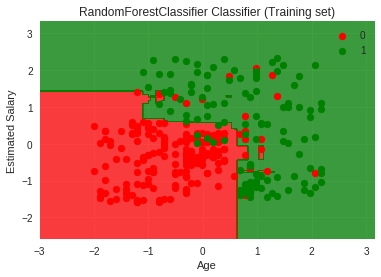

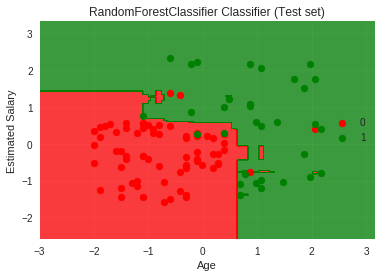

In [0]:
graph(X_train_scaled, X_test_scaled, model)

### cross validation

In [0]:
model = RandomForestClassifier(n_estimators = 10, max_depth = 5)
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- RandomForestClassifier-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [1.         0.75609756 0.90243902 1.         0.975      0.825
 0.825      0.79487179 0.87179487 0.94871795]


variance in scores for 10 fold cross-validationn for RandomForestClassifier:-- 0.08413564983358852




'Mean for 10 fold cross-validation score:-- 0.8898921200750468'

## NaiveBayesClassifier

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.8833333333333333


Test score is 0.9



Train confusion matrix is 
 [[174  15]
 [ 20  91]]

Test confusion matrix is 
 [[65  3]
 [ 7 25]]



classification report is 
              precision    recall  f1-score   support

          0       0.90      0.96      0.93        68
          1       0.89      0.78      0.83        32

avg / total       0.90      0.90      0.90       100



### graph to see decision boundaries

GaussianNB Model 



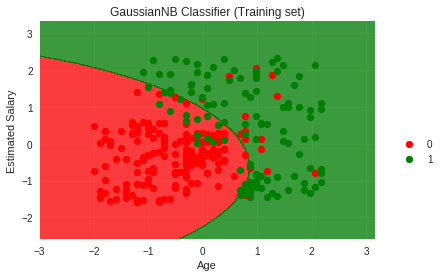

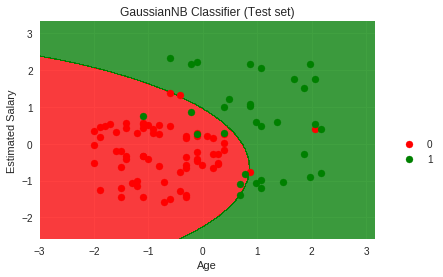

In [0]:
graph(X_train_scaled, X_test_scaled, model)

### cross_vaidation

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
cross_validation(X_scaled, y, model)

10 fold cross-validation for -- GaussianNB-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.82926829 0.7804878  0.95121951 0.975      0.95       0.9
 0.8        0.79487179 0.87179487 0.92307692]


variance in scores for 10 fold cross-validationn for GaussianNB:-- 0.06883632982248508




'Mean for 10 fold cross-validation score:-- 0.8775719199499689'